### Question 3 - [ 35 points ] Naive Bayes Classifier

#### importing libraries

In [1]:
from collections import defaultdict
import pandas as pd
from os import listdir
import os
from os.path import isfile, join
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer as ps
from nltk.stem import WordNetLemmatizer as wl
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
import re
import math
import seaborn as sns
stopword = set(stopwords.words())
import random
from sklearn.metrics import confusion_matrix ,  precision_recall_fscore_support
from sklearn.metrics import accuracy_score

#### Number of top k features to be selected from tf-icf matrix and train:test split ratio

In [2]:
top_k_feat = 50
split = 0.5

#### preprocessing

In [3]:
#Preprocessing 
def preprocess(sent):
    result = sent
    result = " ".join(re.split(r"[^a-zA-Z0-9\s]",result))  # removing speacial characters
    result = " ".join(result.split()) # removing white spaces
    result = re.sub(r'\d+','',result) # remove numbers
    result = re.sub(r'[^\w\s]','',result) # remove punctuation
    result = word_tokenize(result) # Tokenizing words
    result = [ word.lower() for word in result ] # Convertinbg to lower case 
#     result = [ps().stem(i) for i in result]   # Stemming 
#     result = [wl().lemmatize(i) for i in result] #lemmatize 
    result = [word for word in result if word not in stopword] # removing stopwords
    return result

#### Reading files

In [4]:

directory = 'q3_dataset/'
classes = {}
direc = []
count = 0
for filename in os.listdir(directory):
    print(filename)
    direc.append(directory + filename)
    classes[filename] = count 
    count += 1

comp.graphics
rec.sport.hockey
sci.med
sci.space
talk.politics.misc


In [5]:
data = {i:[] for i in range(len(direc))}


In [6]:
count = 0
for i in direc:
    d1 = []
    for filename in os.listdir(i):
        d1.append(filename)
        f =open(i+ "/"+ filename, "r", encoding='cp850')
        data[count].append(Counter(preprocess(f.read())))
    count += 1 
    print(i , len(d1))

q3_dataset/comp.graphics 1000
q3_dataset/rec.sport.hockey 1000
q3_dataset/sci.med 1000
q3_dataset/sci.space 1000
q3_dataset/talk.politics.misc 1000


#### shuffling the data randomly 

In [7]:
for i in data:
    random.shuffle(data[i])

#### performing train test split

In [8]:
train = {i:[] for i in range(len(direc))}
test = {i:[] for i in range(len(direc))}

for i in data:
    trainlen = split * len(data[i])
    for j in range(len(data[i])):
        if j < trainlen:
            train[i].append(data[i][j])
        else:
            test[i].append(data[i][j])
data = train 

#### Creating Term-Frequency matrix

In [9]:
tf = {i:Counter() for i in data}
for i in data:
    for j in data[i]:
        tf[i] += j

#### Creating CF

In [10]:
cf = Counter()
for i in tf:
    for j in tf[i]:
        cf[j] += 1
print(cf)

Counter({'xref': 5, 'cantaloupe': 5, 'srv': 5, 'cs': 5, 'cmu': 5, 'edu': 5, 'comp': 5, 'path': 5, 'crabapple': 5, 'bb': 5, 'andrew': 5, 'news': 5, 'cis': 5, 'ohio': 5, 'state': 5, 'magnus': 5, 'acs': 5, 'newsgroups': 5, 'subject': 5, 'summary': 5, 'message': 5, 'id': 5, 'date': 5, 'apr': 5, 'gmt': 5, 'sender': 5, 'manager': 5, 'followup': 5, 'distribution': 5, 'organization': 5, 'college': 5, 'lines': 5, 'interested': 5, 'offers': 5, 'good': 5, 'medical': 5, 'anybody': 5, 'give': 5, 'recommendations': 5, 'products': 5, 'market': 5, 'particular': 5, 'thank': 5, 'advice': 5, 'mil': 5, 'real': 5, 'time': 5, 'references': 5, 'navy': 5, 'oh': 5, 'article': 5, 'writes': 5, 'hi': 5, 'phone': 5, 'numbers': 5, 'wrong': 5, 'correct': 5, 'package': 5, 'try': 5, 'wave': 5, 'free': 5, 'university': 5, 'new': 5, 'valid': 5, 'email': 5, 'address': 5, 'cd': 5, 'pub': 5, 'release': 5, 'harvard': 5, 'noc': 5, 'near': 5, 'net': 5, 'howland': 5, 'reston': 5, 'ans': 5, 'zaphod': 5, 'mps': 5, 'uwm': 5, 'lin

#### Creating ICF

In [11]:
icf = {}
for i in cf:
    icf[i] = math.log(len(direc) / cf[i])

In [12]:
icf

{'xref': 0.0,
 'cantaloupe': 0.0,
 'srv': 0.0,
 'cs': 0.0,
 'cmu': 0.0,
 'edu': 0.0,
 'comp': 0.0,
 'graphics': 0.5108256237659907,
 'sci': 0.22314355131420976,
 'image': 0.22314355131420976,
 'processing': 0.22314355131420976,
 'path': 0.0,
 'crabapple': 0.0,
 'bb': 0.0,
 'andrew': 0.0,
 'news': 0.0,
 'cis': 0.0,
 'ohio': 0.0,
 'state': 0.0,
 'magnus': 0.0,
 'acs': 0.0,
 'bgsuvax': 0.9162907318741551,
 'dartvax': 0.5108256237659907,
 'coos': 0.9162907318741551,
 'dartmouth': 0.22314355131420976,
 'jian': 1.6094379124341003,
 'lu': 0.9162907318741551,
 'newsgroups': 0.0,
 'subject': 0.0,
 'grayscale': 1.6094379124341003,
 'printer': 1.6094379124341003,
 'summary': 0.0,
 'message': 0.0,
 'id': 0.0,
 'clhi': 1.6094379124341003,
 'date': 0.0,
 'apr': 0.0,
 'gmt': 0.0,
 'sender': 0.0,
 'manager': 0.0,
 'followup': 0.0,
 'distribution': 0.0,
 'organization': 0.0,
 'college': 0.0,
 'hanover': 0.5108256237659907,
 'nh': 0.22314355131420976,
 'lines': 0.0,
 'interested': 0.0,
 'purchasing': 0.

#### TF-ICF matrix

In [13]:
tf_icf = defaultdict(Counter)
for i in tf:
    for j in icf:
        tf_icf[i][j] = tf[i][j] * icf[j]

#### Selecting top k features

In [14]:
topkfeat = set()
for i in tf_icf:
    arr = [(j , tf_icf[i][j]) for j in tf_icf[i]]
    arr.sort(key = lambda x:-x[1])
    for i in range(top_k_feat):
        topkfeat.add(arr[i][0])

In [15]:
print("Unique features" , len(topkfeat))

Unique features 247


In [16]:
def postprocess(data):  # processing the data according to the selected features
    final = []
    target = []
    for i in data:
        for j in data[i]:
            text = []
            for l in j:
                if l in topkfeat:
                    for k in range(j[l]):
                        text.append(l)
            final.append(' '.join(text))
            target.append(i)
    return final , target
    

In [17]:
xtrain , ytrain = postprocess(train)
xtest, ytest = postprocess(test)

In [18]:
xtrain[:10]
# print(ytrain)

['graphics graphics graphics sci sci sci image image image image images',
 'graphics graphics ftp ftp',
 'sci sci sci image image image image graphics graphics graphics motif motif diablo diablo diablo diablo diablo photoshop photoshop',
 'graphics graphics graphics graphics graphics amiga amiga amiga msdos msdos shareware',
 'graphics graphics phigs phigs phigs phigs hardware',
 'graphics viewer',
 'graphics ftp ftp',
 'graphics',
 'graphics photoshop photoshop',
 'graphics viewer viewer images images']

In [19]:
def genfeat(tr, te): # generate feature matrix
    vect = TfidfVectorizer()
    X_tr = vect.fit_transform(tr)
    X_te = vect.transform(te)
    return X_tr, X_te

In [20]:
train_final , test_final = genfeat(xtrain , xtest)

### Naive Bayes From scratch 

In [21]:
class NaiveBayes:

    def __init__(self):
        self.nclasses = 5
        self.pi = np.pi

    def fit(self, X, y):    # fit function
        samples, features = X.shape

        # calculate mean, var, and prior for each class
        self.var = np.zeros((self.nclasses, features), dtype=np.float64)
        self.mean = np.zeros((self.nclasses, features), dtype=np.float64)
        self.priors =  np.zeros(self.nclasses, dtype=np.float64)
        
        for idx in range(5):  # iterating in all classes
            Xc = X[y==idx]
            print(Xc)
            self.mean[idx, :] = Xc.mean(axis=0)
            self.var[idx, :] = Xc.var(axis=0)
            self.priors[idx] = Xc.shape[0] / float(samples)
        

    def predict(self, X):   # for predicting test set
        ypred = []       
        for x in X:
            posteriors = []
            for idx in range(5):  #Iterating in all classes
                var = self.var[idx]
                mean = self.mean[idx]
                pdf =  np.log((np.exp(- (x-mean)**2 / (2 * var + 0.000000000000001))) / ((2 * self.pi * var + 0.000000000000001) ** .5))
                
                poste = np.sum(pdf) + np.log(self.priors[idx])
                posteriors.append(poste)

            ypred.append(posteriors.index(max(posteriors)))
        return np.array(ypred)

In [22]:
model = NaiveBayes()
model.fit(train_final.toarray() , np.array(ytrain))
result_x = model.predict(train_final.toarray())
result_y = model.predict(test_final.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.19514403]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.89834777 0.         0.         ... 0.         0.         0.        ]
 [0.         0.

C:\Users\Yashraj\AppData\Local\Temp/ipykernel_19992/3492963431.py:30: RuntimeWarning: divide by zero encountered in log
  pdf =  np.log((np.exp(- (x-mean)**2 / (2 * var + 0.000000000000001))) / ((2 * self.pi * var + 0.000000000000001) ** .5))


#### Function for printing statistics

In [23]:

def stats(true_label , pred_label):
    cf_mat = confusion_matrix( true_label , pred_label)
    categories = list(classes.keys())
    ss = precision_recall_fscore_support(true_label , pred_label)
    ll = ["class-wise precision","class-wise recall", "classise f1score", "class-wise support"]
    for i in range(len(ss)):
        print(ll[i], ss[i] )
    
    print()
    print("Overall Accuracy:-",accuracy_score(true_label , pred_label))
    
    sns.heatmap(cf_mat, annot = True , xticklabels = categories , yticklabels = categories )
    print("Rows are actual value and cols are predicted labels of Confusion matrix")
    


#### Test results on training data

class-wise precision [0.72886297 1.         0.96464646 0.99054374 0.99393939]
class-wise recall [1.    1.    0.764 0.838 0.984]
classise f1score [0.84317032 1.         0.85267857 0.90790899 0.98894472]
class-wise support [500 500 500 500 500]

Overall Accuracy:- 0.9172
Rows are actual value and cols are predicted labels of Confusion matrix


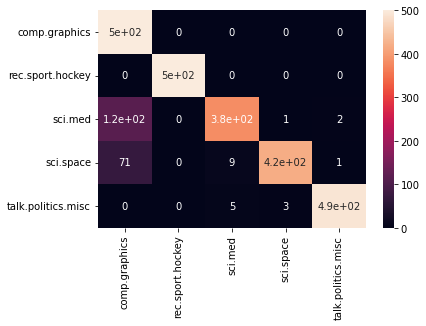

In [24]:
stats(ytrain , result_x)

#### Test results on testing data

class-wise precision [0.63071066 0.99578947 0.95890411 0.97193878 0.97291667]
class-wise recall [0.994 0.946 0.7   0.762 0.934]
classise f1score [0.77173913 0.97025641 0.80924855 0.85426009 0.95306122]
class-wise support [500 500 500 500 500]

Overall Accuracy:- 0.8672
Rows are actual value and cols are predicted labels of Confusion matrix


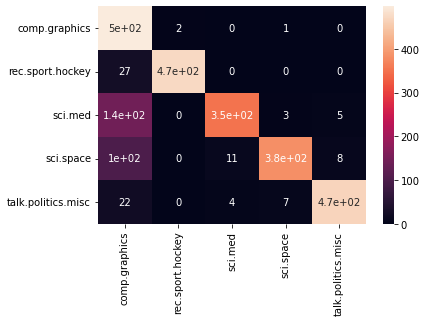

In [25]:
stats(ytest , result_y)

#### Step 6 and step 7 is provided in the readme